<IPython.core.display.Javascript object>


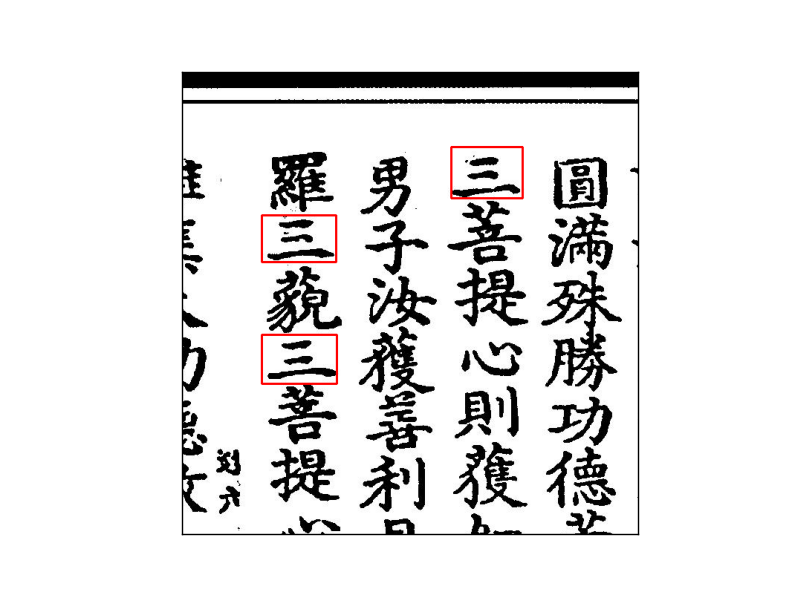

In [25]:
# Load hình

import cv2
import matplotlib.pyplot as plt
%matplotlib notebook

img  = cv2.imread('data/demo.jpg')

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
keys = dict()

with open('data/demo.txt', 'r+', encoding = 'utf-8') as f:
    for line in f:
        data = line.split(' ')
        if data[0] not in keys:
            keys[data[0]] = []

        keys[data[0]].append((int(float(data[1])), int(float(data[2])), int(float(data[3])), int(float(data[4]))))

In [28]:
# Hiện tất cả vị trí của chữ 三 (tam) trong văn bản

word = '三'

for position in keys[word]:
    x1, y1, x2, y2 = position
    cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
# Cắt kí tự theo vị trí và lưu thành các tập tin
# Resize kich thuoc thanh 32 x 32

delta = 0 # Them padding neu nhu chu bi cat thieu
(height, width) = (32, 32)

for position in keys[word]:
    x1, y1, x2, y2 = position
    cropped_img = cv2.resize(img[y1:y2 + delta, x1:x2 + delta], (height, width))
    cv2.imwrite('{0}-{1}{2}{3}{4}.jpg'.format(word, x1, x2, y1, y2), cropped_img)

In [ ]:
# Convert hình thành grayscale (trắng đen)

img_gray = cv2.imread('data/demo_colored.png', cv2.IMREAD_GRAYSCALE)

(thresh, img_bw) = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(img_bw, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

# cv2.imwrite('colored_to_grey.jpg', img_bw)